### ML-ASSIGNMENT-2

In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
data = pd.read_csv("Employee.csv")
data

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [4]:
data1 = data.copy()
data1

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [5]:
print("Displaying first 10 rows")
print("\t")
data1.head(10)

Displaying first 10 rows
	


,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [7]:
print("Displaying last 10 rows")
print("\t")
data1.tail(10)

Displaying last 10 rows
	


,Company,Age,Salary,Place,Country,Gender
138,CTS,44.0,3033.0,Cochin,India,0
139,Congnizant,22.0,2934.0,Noida,India,0
140,Infosys,44.0,4034.0,Hyderabad,India,0
141,TCS,33.0,5034.0,Calcutta,India,0
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1
147,Infosys,22.0,8202.0,Cochin,India,0


In [8]:
print("The shape of the dataset:")
data1.shape

The shape of the dataset:


(148, 6)

In [11]:
print("Feature properties of the dataset is:")
print("\t")
data1.info()

Feature properties of the dataset is:
	
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [12]:
print("Feature names of the dataset:")
data1.columns

Feature names of the dataset:


Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')

#### statistical analysis

In [14]:
data1.describe() 

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [15]:
for column in data1.columns:
    unique_values = data1[column].unique()
    print(f"\nColumn: {column}")
    print("Unique Values:", unique_values)
    print("Number of Unique Values:", len(unique_values))
    


Column: Company
Unique Values: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Number of Unique Values: 7

Column: Age
Unique Values: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Number of Unique Values: 30

Column: Salary
Unique Values: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Number of Unique Values: 41

Column: Place
Unique Values: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Number of Unique Values: 12

Column: Country
Unique Values: ['India']
Number of Unique Values: 1

Column: Gender
Unique Values: [0 1]
Number of Unique Values: 2


In [22]:
print("Renamed Features of the Dataset")
print("\t")
data1.columns = data1.columns.str.upper()
data1

Renamed Features of the Dataset
	


,COMPANY,AGE,SALARY,PLACE,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [27]:
print("Current Columns:", data1.columns.tolist())

new_column_names = {
    'PLACE': 'CITY',}

data1 = data1.rename(columns=new_column_names)

print("\nUpdated Columns:", data1.columns.tolist())

Current Columns: ['COMPANY', 'AGE', 'SALARY', 'CITY', 'COUNTRY', 'GENDER']

Updated Columns: ['COMPANY', 'AGE', 'SALARY', 'CITY', 'COUNTRY', 'GENDER']


In [28]:
data1

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


### data cleaning

In [30]:
print("Missing/Null values in each column:")
print('\t')
missing_values = data1.isnull().sum()
missing_values

Missing/Null values in each column:
	


COMPANY     8
AGE        18
SALARY     24
CITY       14
COUNTRY     0
GENDER      0
dtype: int64

In [31]:
print("Duplicate values:")
print('\t')
data1.duplicated().sum()

Duplicate values:
	


4

In [32]:
data1.drop_duplicates(inplace=True)

In [34]:
data1.shape

(144, 6)

In [36]:
print("Replacing 0 with NaN values in the 'Age' column")
print('\t')
data1['AGE'] = data1['AGE'].replace(0,np.nan)


Replacing 0 with NaN values in the 'Age' column
	


In [37]:
data1

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [38]:
print("Replacing missing values in the numerical columns with median,mode")
print('\t')
data1['AGE'] = data1['AGE'].fillna(data1['AGE'].median())
data1['SALARY'] = data1['SALARY'].fillna(data1['SALARY'].median())
data1

Replacing missing values in the numerical columns with median,mode
	


,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [39]:
print("Replacing missing values in the categorical columns with mode")
print('\t')
data1['COMPANY'] = data1['COMPANY'].fillna(data1['COMPANY'].mode()[0])
data1['CITY'] = data1['CITY'].fillna(data1['CITY'].mode()[0])
data1['GENDER'] = data1['GENDER'].fillna(data1['GENDER'].mode()[0])

Replacing missing values in the categorical columns with mode
	


In [40]:
data1

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
0,TCS,20.0,5000.0,Chennai,India,0
1,Infosys,30.0,5000.0,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
142,Infosys Pvt Lmt,22.0,8202.0,Mumbai,India,0
143,TCS,33.0,9024.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [44]:
Q1_age = data1['AGE'].quantile(0.25)
Q3_age = data1['AGE'].quantile(0.75)

IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

age_outliers = data1[(data1['AGE'] < lower_bound_age) | (data1['AGE'] > upper_bound_age)]

Q1_salary = data1['SALARY'].quantile(0.25)
Q3_salary = data1['SALARY'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

lower_bound_salary = Q1_salary - 1.5 * IQR_salary
upper_bound_salary = Q3_salary + 1.5 * IQR_salary

salary_outliers = data1[(data1['SALARY'] < lower_bound_salary) | (data1['SALARY'] > upper_bound_salary)]

print("Outliers in Age:")
print(age_outliers)
print("\n")
print("Outliers in Salary:")
print(salary_outliers)

Outliers in Age:
Empty DataFrame
Columns: [COMPANY, AGE, SALARY, CITY, COUNTRY, GENDER]
Index: []


Outliers in Salary:
Empty DataFrame
Columns: [COMPANY, AGE, SALARY, CITY, COUNTRY, GENDER]
Index: []


###  data analysis

In [45]:
filtered_data = data1[(data1['AGE'] > 40) & (data1['SALARY'] < 5000)]
filtered_data

,COMPANY,AGE,SALARY,CITY,COUNTRY,GENDER
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


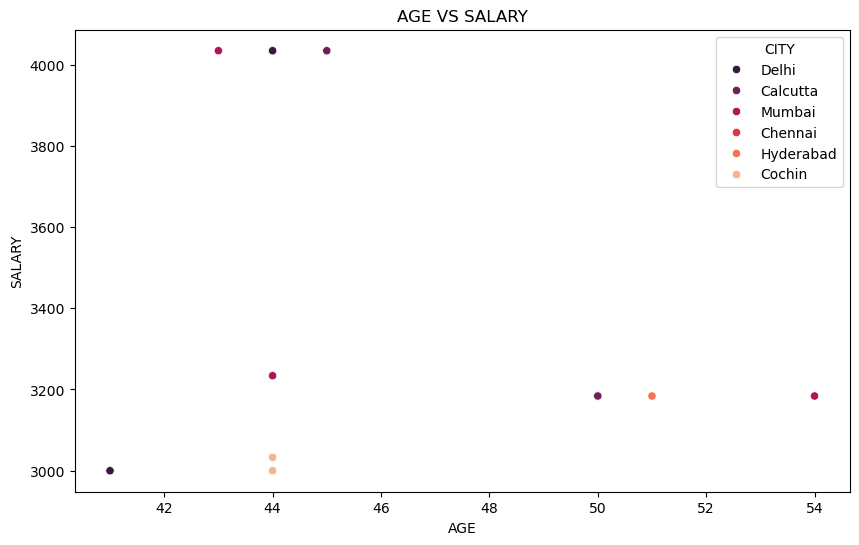

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='AGE', y='SALARY', hue='CITY', palette='rocket')
plt.title('AGE VS SALARY')
plt.xlabel('AGE')
plt.ylabel('SALARY')
plt.legend(title='CITY')
plt.show()

In [49]:
city_counts = data1['CITY'].value_counts()
city_counts

CITY
Mumbai        48
Calcutta      32
Chennai       14
Delhi         14
Cochin        13
Noida          8
Hyderabad      8
Podicherry     3
Pune           2
Bhopal         1
Nagpur         1
Name: count, dtype: int64

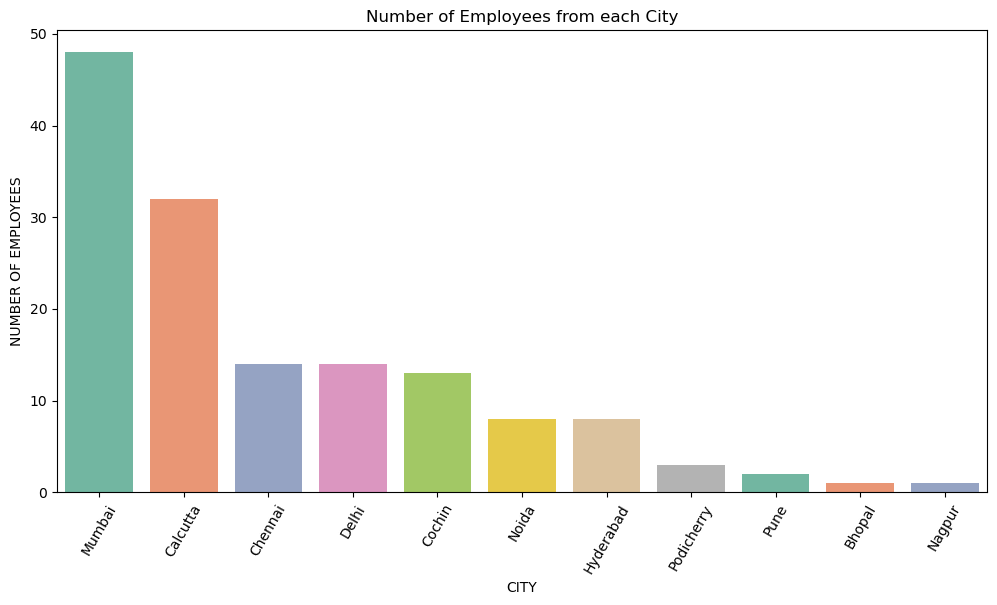

In [52]:
plt.figure(figsize = (12, 6))
sns.barplot(x = city_counts.index, y = city_counts.values, palette='Set2')
plt.title('Number of Employees from each City')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF EMPLOYEES')
plt.xticks(rotation = 60)
plt.show()

In [53]:
# Data encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['COMPANY', 'CITY', 'COUNTRY', 'GENDER']

label_encoder = LabelEncoder()

data1['CITY'] = label_encoder.fit_transform(data1['CITY'])

data1['COUNTRY'] = label_encoder.fit_transform(data1['COUNTRY'])

print(data1.head(10))

   COMPANY   AGE  SALARY  CITY  COUNTRY  GENDER
0      TCS  20.0  5000.0     2        0       0
1  Infosys  30.0  5000.0     6        0       0
2      TCS  35.0  2300.0     1        0       0
3  Infosys  40.0  3000.0     4        0       0
4      TCS  23.0  4000.0     6        0       0
5  Infosys  33.0  5000.0     1        0       0
6      TCS  33.0  6000.0     2        0       1
7  Infosys  23.0  7000.0     6        0       1
8      TCS  34.0  8000.0     1        0       1
9      CTS  45.0  9000.0     4        0       0


In [57]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['COMPANY', 'CITY', 'COUNTRY', 'GENDER']

data_encoded = pd.get_dummies(data1, columns=['COMPANY', 'CITY', 'COUNTRY', 'GENDER'], drop_first=True)

print(data_encoded.head())

    AGE  SALARY  COMPANY_Congnizant  COMPANY_Infosys  COMPANY_Infosys Pvt Lmt  \
0  20.0  5000.0               False            False                    False   
1  30.0  5000.0               False             True                    False   
2  35.0  2300.0               False            False                    False   
3  40.0  3000.0               False             True                    False   
4  23.0  4000.0               False            False                    False   

   COMPANY_TCS  COMPANY_Tata Consultancy Services  CITY_1  CITY_2  CITY_3  \
0         True                              False   False    True   False   
1        False                              False   False   False   False   
2         True                              False    True   False   False   
3        False                              False   False   False   False   
4         True                              False   False   False   False   

   CITY_4  CITY_5  CITY_6  CITY_7  CITY_8  CITY_9 

In [58]:
# 5

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

numerical_columns = ['AGE', 'SALARY']

data_standard_scaled = data1.copy()
data_standard_scaled[numerical_columns] = standard_scaler.fit_transform(data_standard_scaled[numerical_columns])

data_minmax_scaled = data1.copy()
data_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(data_minmax_scaled[numerical_columns])

print("Data after Standard Scaling:")
print(data_standard_scaled.head(10))

print("\nData after Min-Max Scaling:")
print(data_minmax_scaled.head(10))

Data after Standard Scaling:
   COMPANY       AGE    SALARY  CITY  COUNTRY  GENDER
0      TCS -1.484676 -0.100827     2        0       0
1  Infosys -0.267174 -0.100827     6        0       0
2      TCS  0.341577 -1.243735     1        0       0
3  Infosys  0.950328 -0.947426     4        0       0
4      TCS -1.119426 -0.524127     6        0       0
5  Infosys  0.098077 -0.100827     1        0       0
6      TCS  0.098077  0.322472     2        0       1
7  Infosys -1.119426  0.745771     6        0       1
8      TCS  0.219827  1.169070     1        0       1
9      CTS  1.559079  1.592369     4        0       0

Data after Min-Max Scaling:
   COMPANY       AGE    SALARY  CITY  COUNTRY  GENDER
0      TCS  0.081081  0.445089     2        0       0
1  Infosys  0.351351  0.445089     6        0       0
2      TCS  0.486486  0.137817     1        0       0
3  Infosys  0.621622  0.217480     4        0       0
4      TCS  0.162162  0.331285     6        0       0
5  Infosys  0.432432  0.